In [1]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from grouping import Grouping, Resource
import plotter

In [2]:
# we will run some heterogeneity calculations on the pcbc data in this notebook
FILE_LOC = '../data/ptfi_1/'
FILE_NAME = 'DP_block_grade estimates_actual tons_dp coordinate.xlsx'

GIF_SAVE_LOC = '../outputs/gifs/'

draw_tons = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='Drawn Tons')
cu_pcbc = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='Cu_PCBC')
au_pcbc = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='Au_PCBC')
dp_coords = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='DP_Coordinates')

In [3]:
names = {
    'Draw Point Name': 'name'
}

cols = list(draw_tons.columns)
for col_name in cols:
    if isinstance(col_name, dt.datetime):
        names[col_name] = f'{col_name.year}_{col_name.month}'
        
draw_tons = draw_tons.rename(
    columns = names
)

draw_tons = draw_tons.set_index('name').astype(float)

In [4]:
names = {
    'Draw Point Name': 'name',
    44835: '2022_10'
}

cols = list(cu_pcbc.columns)
for col_name in cols:
    if isinstance(col_name, dt.datetime):
        names[col_name] = f'{col_name.year}_{col_name.month}'
        
cu_pcbc = cu_pcbc.rename(
    columns = names
)

cu_pcbc = cu_pcbc.set_index('name').astype(float)

In [5]:
names = {
    'Draw Point Name': 'name'
}

cols = list(au_pcbc.columns)
for col_name in cols:
    if isinstance(col_name, dt.datetime):
        names[col_name] = f'{col_name.year}_{col_name.month}'
        
au_pcbc = au_pcbc.rename(
    columns = names
)

au_pcbc = au_pcbc.set_index('name').astype(float)

In [6]:
months = list(draw_tons.columns)
dhids = list(draw_tons.index)

In [7]:
draw_tons.replace(0, np.nan, inplace=True)

In [8]:
for dhid in dhids:
    for month in months:
        if draw_tons[month][dhid] is np.nan:
            if au_pcbc[month][dhid] != 0:
                print(f"au_pcbc at {dhid} {month} is {au_pcbc[month][dhid]}")
        # else:
        #     if cu_pcbc[month][dhid] == 0:
        #         print(f"cu_pcbc at {dhid} {month} is {cu_pcbc[month][dhid]}")
            

In [9]:
groups = {}

for dhid in dhids:
    weights = draw_tons.loc[dhid]
    if weights.isnull().all():
        print(f"No data for {dhid}")
    else:
        groups[dhid] = Grouping(dhid)
        # Add CU
        groups[dhid].add_resource("CU", weights, cu_pcbc.loc[dhid])
        # Add AU
        groups[dhid].add_resource("AU", weights, au_pcbc.loc[dhid])

No data for P04-11W
No data for P04-12W
No data for P04-13W
No data for P04-14W
No data for P04-15W
No data for P05-08W
No data for P05-09W
No data for P05-10W
No data for P05-11E
No data for P05-11W
No data for P05-12E
No data for P05-12W
No data for P05-13E
No data for P05-13W
No data for P05-14E
No data for P05-14W
No data for P05-15E
No data for P05-15W
No data for P05-16W
No data for P05-17W
No data for P05-18W
No data for P05-19W
No data for P05-20W
No data for P06-07W
No data for P06-08E
No data for P06-08W
No data for P06-09E
No data for P06-09W
No data for P06-10E
No data for P06-10W
No data for P06-11E
No data for P06-11W
No data for P06-12E
No data for P06-12W
No data for P06-13E
No data for P06-13W
No data for P06-14E
No data for P06-14W
No data for P06-15E
No data for P06-15W
No data for P06-16E
No data for P06-16W
No data for P06-17E
No data for P06-17W
No data for P06-18E
No data for P06-18W
No data for P06-19E
No data for P06-19W
No data for P06-20E
No data for P06-20W


In [10]:
len(groups)

398

In [11]:
groups['P08-04W'].resources['CU'].heterogeneity

0.0464221476730414

# Output

Output G-R Graphs

In [12]:
import matplotlib.pyplot as plt

output_dir = "../outputs/het_analysis_pcbc/"
elements = [
    'CU',
    'AU'
]

# fig = plt.figure()
# fig.set_size_inches(8, 8)


# for dhid, group in groups.items():
#     save_loc = output_dir + f'{dhid}/'
#     if not os.path.exists(save_loc):
#         os.makedirs(save_loc)

#     for element in elements:
#         fig.clear()
#         ax = fig.add_subplot()

#         het = group.resources[element].heterogeneity
#         df = group.resources[element].info
        
#         if len(df) > 0:
#             ax.set_title(f'{dhid}_{element}_HET={het:.2f}')
#             plotter.plot_grade_recovery_curve(ax, df, element)

#             fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')

In [13]:
import matplotlib.ticker as mtick

# then we want to graph the mass yield curves for all the individual elements
no_of_graphs = len(elements)
output_dir = "../outputs/het_analysis_pcbc/"

# fig = plt.figure()
# fig.set_size_inches(12, 12)

# s = 0.5
# alpha = 0.4

# for element in elements:
#     fig.clear()
#     ax = fig.add_subplot()
    
#     ax_sec = ax.twinx()

#     ax.set_xlabel("Cumulative Mass %")
#     ax.set_xlim(0, 1)
#     ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
#     ax.set_ylabel(f"Cumulative {element} Grade", c="blue")
    
#     ax_sec.set_ylabel(f"Cumulative {element} Recovery", c="red") 
#     ax_sec.set_ylim(0, 1)
#     ax_sec.set_yticks([0, 0.25, 0.5, 0.75, 1])
#     ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#     for dhid, drillhole in groups.items():
#         if element in drillhole.resources:
#             df = drillhole.resources[element].info
#             x = df['cml_weight_pct']
#             y = df['cml_grade']
#             ax.scatter(x, y, color='blue', alpha=alpha, s=s)
            
#             y = df['cml_recovery']
#             ax_sec.scatter(x, y, color='red', alpha=alpha, s=s)
            
#     ax.set_ylim([0, None])
#     ax.set_title(f'master_{element}')

#     save_loc = output_dir + f'master/'
#     if not os.path.exists(save_loc):
#         os.makedirs(save_loc)
#     fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

In [14]:
combined_data = Grouping('combined_data')
flat_draw_tons = draw_tons.to_numpy().flatten()
combined_data.add_resource("CU", flat_draw_tons, cu_pcbc.to_numpy().flatten())
combined_data.add_resource("AU", flat_draw_tons, au_pcbc.to_numpy().flatten())

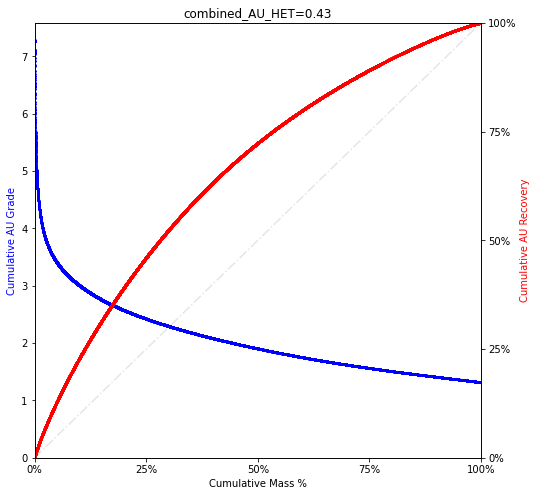

In [15]:
output_dir = "../outputs/het_analysis_pcbc/"

fig = plt.figure()
fig.set_size_inches(8, 8)

for element in elements:
    fig.clear()
    ax = fig.add_subplot()

    het = combined_data.resources[element].heterogeneity
    df = combined_data.resources[element].info
        
    if len(df) > 0:
        ax.set_title(f'combined_{element}_HET={het:.2f}')
        plotter.plot_grade_recovery_curve(ax, df, element)

        save_loc = output_dir + f'combined/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'combined_{element}.png', format='png', dpi=200)

# Visualize

In [16]:
dp_coords = dp_coords.rename(
    columns={
        "Draw Point Name": "name", 
        "X-dpt": "x",
        'Y-dpt': 'y',
        'Z-dpt': 'z'
    }
)
dp_coords = dp_coords.set_index('name')

In [17]:
for dhid, group in groups.items():
    if dhid not in list(dp_coords.index):
        print('dhid')

In [55]:
hs = {}
for dpid in list(dp_coords.index):
    if dpid not in groups:
        for element in elements:
            if element not in hs:
                hs[element] = []
            hs[element].append(np.nan)
    else:
        dp = groups[dpid]
        for element in elements:
            if element not in hs:
                hs[element] = []
            if element in dp.resources:
                dhr = dp.resources[element]
                hs[element].append(dp.resources[element].heterogeneity)
            else:
                hs[element].append(np.nan)

In [140]:
import matplotlib.colors as colors
from mpl_toolkits import mplot3d

%matplotlib qt


fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'CU'

h = np.array(hs[element])

# ax.scatter3D(
#     dp_coords['x'], 
#     dp_coords['y'], 
#     dp_coords['z'],
#     s=1,
#     alpha=0.5,
#     c='grey'
# )
# ax.set_title(element)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

x, y, z = dp_coords['x'], dp_coords['y'], dp_coords['z']

col = []
# cmap = colors.Colormap('viridis')

import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')

ch = np.array(h)
ch = ch[~np.isnan(ch)]
percentile90 = np.quantile(ch, 0.97)
print(percentile90)
def normalize(i: float):
    return i / percentile90

for het in h:
    if not np.isnan(het):
        col.append(cmap(normalize(het)))
    else:
        col.append((0.7, 0.7, 0.7, 0.1))

# col = np.where(np.isnan(h), 'red', h)
# ma_h = np.ma.array(h, mask=np.isnan(h))
# cmap = plt.get_cmap('viridis').copy()
# cmap.set_bad('grey',1.)

p = ax.scatter3D(
    x, 
    y,
    z, 
    c=col,
    # cmap=cmap,
    s=40,
    alpha=1
)
ax.set_title(element)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.set_zlim([2550, 2650])
fig.colorbar(p)

0.4092801225549097
